#Modelo de colas (Sistema de línea de espera con un servidor)

# Librerias

In [1]:
import random as rnd
import math 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parámetros

- Generar aleatorios para los tiempos de entre llegadas ( Exponencial )
- Generar aleatorios para los tiempos de atención ( Exponencial )
- Declarar un tiempo T, donde no se permitan más llegadas
- Para calcular el tiempo de espera: **salida - ( llegada + atencion )**
- Para calcular el tiempo de salida del banco: 
    - Para el primer cliente: **llegada + atencion**
    - Para la llegada > salida del anterior: **llegada + atencion**
    - Para los demas: **salida=salida + atencion**

# Implementación

In [2]:
T = 480 # Tiempo que dura el banco abierto ( 8 horas )
llegada = 0 # tiempo en que llega una persona
n = 0 # Cantidad de personas atendidas
salida = 0 # Tiempo de salida
lamda_llegada = 0.5 #30 personas sobre 60 minutos
lamda_atencion = 0.5 #30 personas sobre 60 minutos

entre_llegadas = [] # Lista para guardar el tiempo que dura en llegar una persona a la otra

llegadas = [] # Lista para guardar los tiempos de llegada
atenciones = [] # Lista para guardar los tiempos de atencion
salidas = [] # Lista para guardar el tiempo de salida de las personas
tiempo_esperas = [] # Lista para guardar el tiempo de espera de las personas
tiempo_total_persona=[]

while salida <= T : 

  entre_llegada = -(1/lamda_llegada) * math.log( rnd.random() ) # Se generan las entre_llegadas
  atencion = -(1/lamda_atencion) * math.log( rnd.random() ) # Se generan los tiempos de atencion del servidor 1
  llegada += entre_llegada # Se suman los tiempos entre_llegadas para saber el tiempo de cada llegada

  llegadas.append( round(llegada, 3) ) # Se guardan las llegadas
  entre_llegadas.append( round(entre_llegada, 3) ) # Se guardan las entre_llegadas
  atenciones.append( round(atencion, 3) ) # Se guardan los tiempos de atencion

  if salida == 0 :
    salida = llegada + atencion
  else :
    if llegada > salida:
      salida = llegada + atencion
    else :
      salida += atencion

  salidas.append( round(salida, 3) )  
  tiempo_esperas.append( round(salida - ( llegada + atencion ), 3) )
  tiempo_total_persona.append(round(tiempo_esperas[n]+atencion ,3))
  
  n += 1

In [3]:
data={
    'entre_llegadas':entre_llegadas,
    'llegadas':llegadas,
    'tiempo_esperas':tiempo_esperas,
    'atenciones':atenciones,
    'salidas':salidas,
    'tiempo_total':tiempo_total_persona
}
dataframe=pd.DataFrame(data)
dataframe

,entre_llegadas,llegadas,tiempo_esperas,atenciones,salidas,tiempo_total
0,4.160,4.160,0.000,6.291,10.451,6.291
1,1.253,5.412,5.039,2.404,12.855,7.443
2,0.318,5.731,7.124,2.424,15.279,9.548
3,3.894,9.624,5.655,2.979,18.258,8.634
4,1.347,10.971,7.287,6.181,24.439,13.468
...,...,...,...,...,...,...
217,8.389,465.463,7.746,2.077,475.285,9.823
218,2.076,467.538,7.747,0.363,475.648,8.110
219,1.912,469.450,6.197,1.720,477.368,7.917
220,7.672,477.122,0.245,1.347,478.715,1.592


In [5]:
print( 'Cantidad de personas atendidas: ', n )

personasXhora=[]
i=1
index_ant=0
for index, time in enumerate(dataframe['salidas']):
  if time>=60*i:
    personasXhora.append(index-index_ant)
    index_ant=index
    i+=1
print('\nCantidad de personas atendidas por hora en el servidor 1:', np.mean(personasXhora))

print( '\nTiempo del servidor 1 ocupado: ', round(sum(atenciones) ,3) )

print( '\nTiempo del servidor 1 desocupado: ', round(T-sum(atenciones) ,3) )

print("\nÚltima salida del servidor 2:", salidas[-1])

Cantidad de personas atendidas:  222

Cantidad de personas atendidas por hora en el servidor 1: 27.625

Tiempo del servidor 1 ocupado:  467.572

Tiempo del servidor 1 desocupado:  12.428

Última salida del servidor 2: 482.038


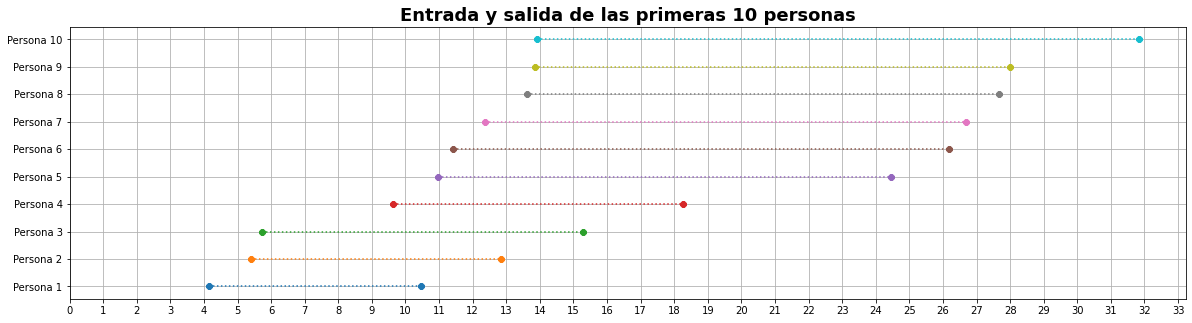

In [7]:
inicio=0
fin=10

fig , ax1 = plt.subplots(figsize=(20,5))
for i in range(inicio,fin):
  x = [llegadas[i], salidas[i]]
  y=[i,i]
  ax1.plot(x, y, "8:")

ax1.set_yticks(np.arange(inicio, fin, 1))
labels = ("Persona {}".format(n+1) for n in range(inicio, fin))
ax1.set_yticklabels(labels)

time=[llegadas[inicio:fin], salidas[inicio:fin]]
ax1.set_xticks(np.arange(0, np.max(time)+2, 1))

plt.title("Entrada y salida de las primeras 10 personas", 
          fontdict={'weight': 'bold',
                    'size': 18})

plt.grid()
fig.show()